In [1]:
import pandas as pd

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


#### Identificar y solucionar cualquier valor duplicado.

In [2]:
def check_duplicates(df, columns=None):
    """
    Comprehensive duplicate checker for a DataFrame.
    
    Parameters:
    df (pandas.DataFrame): DataFrame to check for duplicates
    columns (list, optional): Specific columns to check for duplicates. If None, checks all columns
    
    Returns:
    dict: Dictionary containing duplicate analysis results
    """
    # Initialize results dictionary
    results = {}
    
    # Check entire rows if no columns specified
    if columns is None:
        columns = df.columns.tolist()
    
    # Get duplicate rows
    duplicates = df.duplicated(subset=columns, keep='first')
    duplicate_df = df[duplicates]
    
    # Get rows with their duplicate counts
    duplicate_counts = df.duplicated(subset=columns, keep=False)
    value_counts = df[duplicate_counts][columns].value_counts()
    
    # Compile results
    results['has_duplicates'] = duplicates.any()
    results['total_duplicate_rows'] = duplicates.sum()
    results['duplicate_percentage'] = (duplicates.sum() / len(df) * 100).round(2)
    results['duplicate_rows'] = duplicate_df
    
    # Get index positions of duplicates
    results['duplicate_indices'] = duplicate_df.index.tolist()
    
    # Get most common duplicate values
    results['most_common_duplicates'] = value_counts.head()
    
    # Generate summary
    print(f"Duplicate Analysis Summary:")
    print(f"- Total rows in DataFrame: {len(df)}")
    print(f"- Number of duplicate rows: {results['total_duplicate_rows']}")
    print(f"- Percentage of duplicates: {results['duplicate_percentage']}%")
    
    if results['has_duplicates']:
        print("\nFirst few duplicate values:")
        print(results['most_common_duplicates'])
    
    return results


check_duplicates(df)

Duplicate Analysis Summary:
- Total rows in DataFrame: 7043
- Number of duplicate rows: 0
- Percentage of duplicates: 0.0%


{'has_duplicates': np.False_,
 'total_duplicate_rows': np.int64(0),
 'duplicate_percentage': np.float64(0.0),
 'duplicate_rows': Empty DataFrame
 Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
 Index: []
 
 [0 rows x 21 columns],
 'duplicate_indices': [],
 'most_common_duplicates': Series([], Name: count, dtype: int64)}

In [3]:
print(df.shape)
df.nunique()

(7043, 21)


customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

Podemos ver que todos los customerID son unicos, y que nuestras columnas categoricas son consistentes en todo el dataset.

#### Asegurarse de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.

In [4]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.customerID = df.customerID.astype('string')
df.gender = df.gender.astype('category')
df.SeniorCitizen = df.SeniorCitizen.astype('bool')
df['Partner'] = df['Partner'].map({'Yes': True, 'No': False})
df['Dependents'] = df['Dependents'].map({'Yes': True, 'No': False})
df['PhoneService'] = df['PhoneService'].map({'Yes': True, 'No': False})
df.MultipleLines = df.MultipleLines.astype('category')
df.InternetService = df.InternetService.astype('category')
df.OnlineSecurity = df.OnlineSecurity.astype('category')
df.OnlineBackup = df.OnlineBackup.astype('category')
df.DeviceProtection = df.DeviceProtection.astype('category')
df.TechSupport  = df.TechSupport .astype('category')
df.StreamingTV = df.StreamingTV.astype('category')
df.StreamingMovies = df.StreamingMovies.astype('category')
df.Contract = df.Contract.astype('category')
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes': True, 'No': False})
df.PaymentMethod = df.PaymentMethod.astype('category')
#reemplazo los strings vacios en TotalCharges por None y convierto todo a Numerico
df['TotalCharges'] = df['TotalCharges'].replace(r'^\s*$', None, regex=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
df['Churn'] = df['Churn'].map({'Yes': True, 'No': False})

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   string  
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   bool    
 3   Partner           7043 non-null   bool    
 4   Dependents        7043 non-null   bool    
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   bool    
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

#### Identificar y solucionar cualquier inconsistencia en los valores categóricos (ejemplo: cat, Cat, cats).

In [7]:
# Get list of categorical columns
categorical_columns = df.select_dtypes(include=['category']).columns

# Display unique values for each categorical column
for col in categorical_columns:
    print(f"\n{col}:")
    print(df[col].unique())


gender:
['Female', 'Male']
Categories (2, object): ['Female', 'Male']

MultipleLines:
['No phone service', 'No', 'Yes']
Categories (3, object): ['No', 'No phone service', 'Yes']

InternetService:
['DSL', 'Fiber optic', 'No']
Categories (3, object): ['DSL', 'Fiber optic', 'No']

OnlineSecurity:
['No', 'Yes', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']

OnlineBackup:
['Yes', 'No', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']

DeviceProtection:
['No', 'Yes', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']

TechSupport:
['No', 'Yes', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']

StreamingTV:
['No', 'Yes', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']

StreamingMovies:
['No', 'Yes', 'No internet service']
Categories (3, object): ['No', 'No internet service', 'Yes']

Contract:
['Month-to-month', 'One y

Podemos ver que de nuestras variables categoricas, tienen categorias consistentes

#### Identificar y solucionar cualquier valor faltante en el dataset. Rellenar los valores faltantes con un marcador adecuado para el tipo de dato.

In [8]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
df.TotalCharges.describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

Tenemos 11 valores faltantes en TotalCharges, pero tenemos dos columnas que nos pueden dar un valor bastante aproximado de estos, o exacto en el caso de que su tarifa no haya cambiado, MonthlyCharges, que tiene su tarifa mensual, y Tenure, que nos dice cuantos meses llevan pagando.

In [10]:
df.loc[df['TotalCharges'].isna(), 'TotalCharges'] = df['MonthlyCharges'] * df['tenure']

In [11]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### Identificar y solucionar cualquier punto de dato inapropiado o inusual (ejemplo: la edad no puede ser 325).

In [12]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


lo unico que podria ser inusual es donde TotalCharges es 0, voy a revisar mejor esos datos para ver si tienen sentido

In [13]:
df[df['TotalCharges'] == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,False,True,True,0,False,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,True,Bank transfer (automatic),52.55,0.0,False
753,3115-CZMZD,Male,False,False,True,0,True,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,False,Mailed check,20.25,0.0,False
936,5709-LVOEQ,Female,False,True,True,0,True,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,False,Mailed check,80.85,0.0,False
1082,4367-NUYAO,Male,False,True,True,0,True,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,False,Mailed check,25.75,0.0,False
1340,1371-DWPAZ,Female,False,True,True,0,False,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,False,Credit card (automatic),56.05,0.0,False
3331,7644-OMVMY,Male,False,True,True,0,True,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,False,Mailed check,19.85,0.0,False
3826,3213-VVOLG,Male,False,True,True,0,True,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,False,Mailed check,25.35,0.0,False
4380,2520-SGTTA,Female,False,True,True,0,True,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,False,Mailed check,20.00,0.0,False
5218,2923-ARZLG,Male,False,True,True,0,True,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,True,Mailed check,19.70,0.0,False
6670,4075-WKNIU,Female,False,True,True,0,True,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,False,Mailed check,73.35,0.0,False


In [14]:
df[df['tenure'] == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,False,True,True,0,False,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,True,Bank transfer (automatic),52.55,0.0,False
753,3115-CZMZD,Male,False,False,True,0,True,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,False,Mailed check,20.25,0.0,False
936,5709-LVOEQ,Female,False,True,True,0,True,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,False,Mailed check,80.85,0.0,False
1082,4367-NUYAO,Male,False,True,True,0,True,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,False,Mailed check,25.75,0.0,False
1340,1371-DWPAZ,Female,False,True,True,0,False,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,False,Credit card (automatic),56.05,0.0,False
3331,7644-OMVMY,Male,False,True,True,0,True,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,False,Mailed check,19.85,0.0,False
3826,3213-VVOLG,Male,False,True,True,0,True,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,False,Mailed check,25.35,0.0,False
4380,2520-SGTTA,Female,False,True,True,0,True,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,False,Mailed check,20.00,0.0,False
5218,2923-ARZLG,Male,False,True,True,0,True,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,True,Mailed check,19.70,0.0,False
6670,4075-WKNIU,Female,False,True,True,0,True,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,False,Mailed check,73.35,0.0,False


Podemos ver que solo tienen TotalCharge == 0 los clientes nuevos, que todavia no pagaron el primer mes del servicio

#### Exploración de datos con Python
Crear dos tipos diferentes de visualizaciones exploratorias univariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

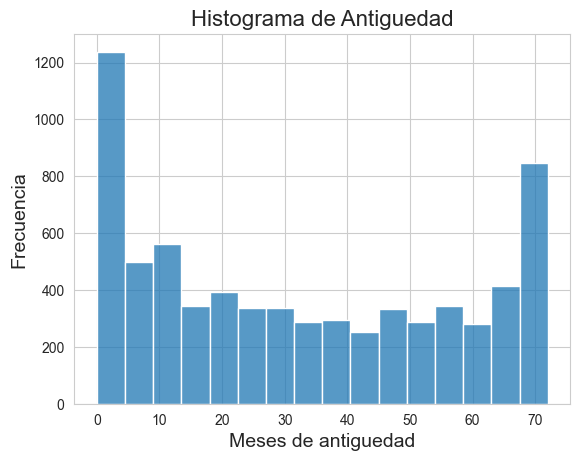

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
# Crear el histograma usando seaborn
sns.set_style("whitegrid")
sns.histplot(df.tenure)
# Añadir títulos y etiquetas
plt.title('Histograma de Antiguedad', fontsize=16)
plt.xlabel('Meses de antiguedad', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
# Mostrar el gráfico
plt.show()


Podemos ver que se registra una enorme cantidad de clientes nuevos, lo que podria indicarnos, o que existe una alta tasa de desercion los primeros meses, o que captaron muchos clientes nuevos con alguna nueva campaña.

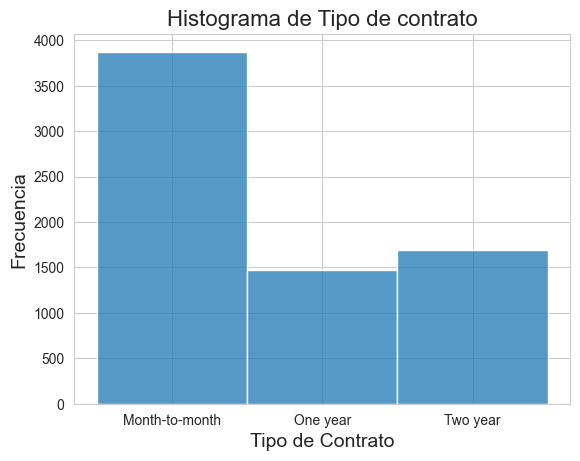

In [16]:
# Crear el histograma usando seaborn
sns.histplot(df.Contract)
# Añadir títulos y etiquetas
plt.title('Histograma de Tipo de contrato', fontsize=16)
plt.xlabel('Tipo de Contrato', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
# Mostrar el gráfico
plt.show()

Podemos ver que la mayoria de los clientes optan por un contrato mes a mes, lo que nos podria indicar que quieren flexibilidad y podrian ser mas propensos a cambiar de proveedor en cualquier momento

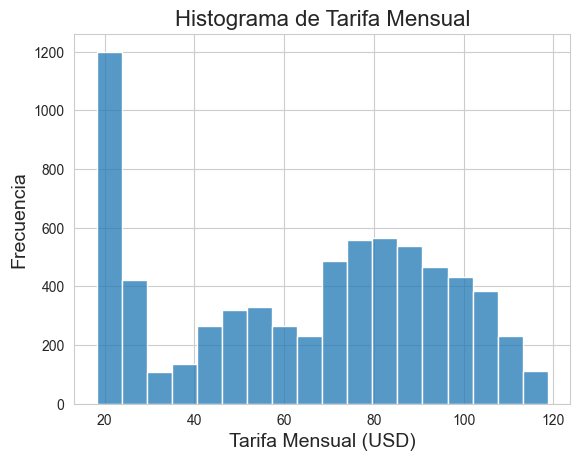

In [17]:
# Crear el histograma usando seaborn

sns.histplot(df.MonthlyCharges)
# Añadir títulos y etiquetas
plt.title('Histograma de Tarifa Mensual', fontsize=16)
plt.xlabel('Tarifa Mensual (USD)', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
# Mostrar el gráfico
plt.show()

Este histograma nos indica una gran concentracion en los planes en alrededor de los 20 USD, esto podria alinearse con nuestra hipotesis, de que contaban con alguna campaña de captacion de clientes, donde ofrecen una promocion con una tarifa mas baja los primeros meses.

Crear dos tipos diferentes de visualizaciones exploratorias multivariadas. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

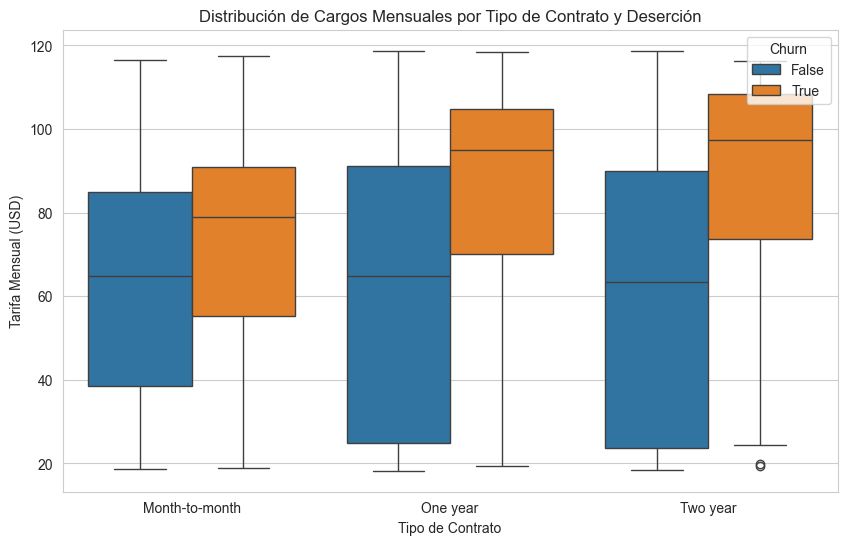

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Contract', y='MonthlyCharges', hue='Churn')
plt.title("Distribución de Cargos Mensuales por Tipo de Contrato y Deserción")
plt.xlabel("Tipo de Contrato")
plt.ylabel("Tarifa Mensual (USD)")
plt.legend(title="Churn", loc="upper right")
plt.show()

En este grafico podemos ver que los que tienden a dejar el servicio estan pagando en promedio mas por este servicio, con el mismo tipo de contrato

C:\Users\Diego\AppData\Local\Temp\ipykernel_25044\4234376368.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contract_churn = df.groupby('Contract')['Churn'].mean().reset_index()  # Calcular tasa de churn por tipo de contrato


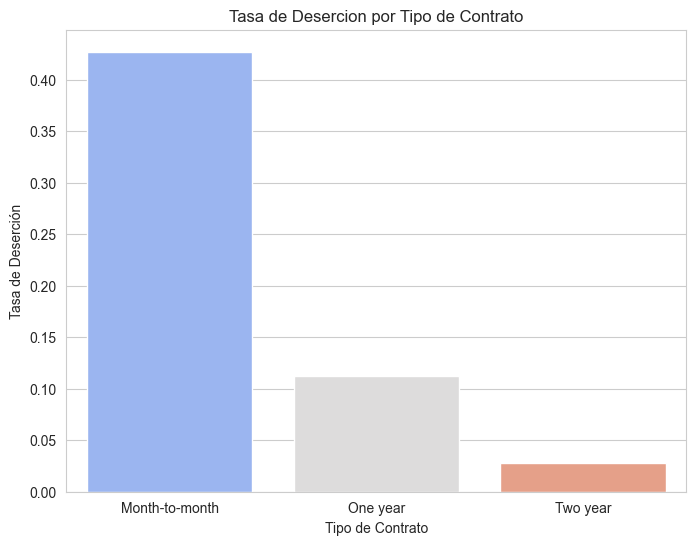

In [19]:
plt.figure(figsize=(8, 6))
contract_churn = df.groupby('Contract')['Churn'].mean().reset_index()  # Calcular tasa de churn por tipo de contrato
sns.barplot(data=contract_churn, x='Contract', y='Churn', hue='Contract', dodge=False, legend=False, palette='coolwarm')
plt.title("Tasa de Desercion por Tipo de Contrato")
plt.xlabel("Tipo de Contrato")
plt.ylabel("Tasa de Deserción")
#plt.ylim(0, 1)  # La tasa de desercion está entre 0 y 1
plt.show()

De este grafico podemos ver que los que tienen el contrato mes a mes, son mucho mas propensos a dejar el servicio que los que tienen el contrato de un año, y con el contrato de dos años ya casi nadie deja el servicio

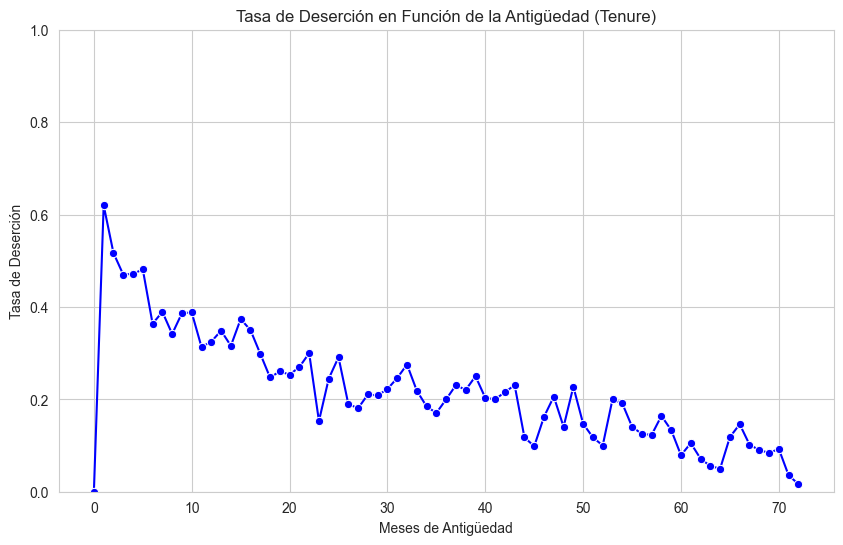

In [20]:
# Agrupamos por 'tenure' y calculamos la tasa de churn promedio en cada mes de antigüedad
tenure_churn = df.groupby('tenure')['Churn'].mean().reset_index()

# Gráfico de líneas
plt.figure(figsize=(10, 6))
sns.lineplot(data=tenure_churn, x='tenure', y='Churn', marker='o', color="b")
plt.title("Tasa de Deserción en Función de la Antigüedad (Tenure)")
plt.xlabel("Meses de Antigüedad")
plt.ylabel("Tasa de Deserción")
plt.ylim(0, 1)  # La tasa de deserción está entre 0 y 1
plt.show()

De este grafico podemos ver que la probabilidad de dejar el servicio baja drasticamente en los primeros meses, y sigue bajando establemente los siguientes meses.
